In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 94B4-BCF5

 Directory of C:\Users\krr\Downloads\TSP

12/21/2024  10:09 PM    <DIR>          .
12/20/2024  05:54 AM    <DIR>          ..
12/21/2024  10:09 PM    <DIR>          .ipynb_checkpoints
12/12/2024  02:25 AM    <DIR>          eda
12/20/2024  12:03 PM            98,903 Evaluaci¢n_de_modelos.ipynb
12/21/2024  10:09 PM                72 evaluaci¢n_v2.ipynb
12/20/2024  12:03 PM            34,673 eval_df.csv
12/12/2024  02:43 PM           283,141 Graficaci¢n de m‚tricas de entrenamiento.ipynb
12/20/2024  06:18 AM            67,758 Modelo reducido 5-cross.ipynb
12/12/2024  08:14 PM           217,294 Modelo reducido.ipynb
12/12/2024  07:07 PM           610,211 Modelo_con_capas_atencionales_para_TSP_(pytorch).ipynb
12/12/2024  11:21 PM                99 out2.csv
12/07/2024  04:32 PM            32,444 simpleproj.ipynb
12/20/2024  12:03 PM            20,182 train_df.csv
12/07/2024  12:53 PM            15,586 xbresson_impl.ipynb
   

In [2]:
import pandas as pd

df_train = pd.read_csv('train_df.csv', index_col=0)
df_eval = pd.read_csv('eval_df.csv', index_col=0)

In [3]:
df_eval

,model_name,fold,cost
0,BaseModel,1,5.927755
1,BaseModel,1,6.535351
2,BaseModel,1,6.602594
3,BaseModel,1,6.763597
4,BaseModel,1,7.058743
...,...,...,...
1495,MultilayerTransformerBlockModel,10,7.180407
1496,MultilayerTransformerBlockModel,10,6.208302
1497,MultilayerTransformerBlockModel,10,5.976801
1498,MultilayerTransformerBlockModel,10,6.413471


In [4]:
## Deviacion estandar para costos promedio
eval_stdd = df_eval.groupby(["model_name", "fold"]).agg(['mean', 'std']).reset_index()
eval_stdd

model_name fold      cost          
                                              mean       std
0                         BaseModel    1  6.478077  0.444440
1                         BaseModel    2  6.591271  0.456725
2                         BaseModel    3  6.518549  0.503797
3                         BaseModel    4  6.552566  0.458611
4                         BaseModel    5  6.518582  0.421300
5                         BaseModel    6  6.430716  0.476100
6                         BaseModel    7  6.755375  0.605706
7                         BaseModel    8  6.670963  0.534787
8                         BaseModel    9  6.661192  0.501805
9                         BaseModel   10  6.599112  0.545361
10  MultilayerTransformerBlockModel    1  6.491579  0.390890
11  MultilayerTransformerBlockModel    2  6.586721  0.526148
12  MultilayerTransformerBlockModel    3  6.635941  0.541720
13  MultilayerTransformerBlockModel    4  6.464882  0.517964
14  MultilayerTransformerBlockModel    5  6.494408  0.487088
15  MultilayerTransformerBlockModel    6  6.630037  0.509610
16  MultilayerTransformerBlockModel    7  6.434684  0.463788
17  MultilayerTransformerBlockModel    8  6.680887  0.458926
18  MultilayerTransformerBlockModel    9  6.684533  0.530824
19  MultilayerTransformerBlockModel   10  6.583831  0.510557
20            TransformerBlockModel    1  6.610746  0.516295
21            TransformerBlockModel    2  6.566754  0.395287
22            TransformerBlockModel    3  6.592470  0.442865
23            TransformerBlockModel    4  6.542330  0.517387
24            TransformerBlockModel    5  6.791586  0.470766
25            TransformerBlockModel    6  6.531769  0.466350
26            TransformerBlockModel    7  6.404640  0.431835
27            TransformerBlockModel    8  6.508395  0.489126
28            TransformerBlockModel    9  6.404728  0.446923
29            TransformerBlockModel   10  6.517604  0.505561

In [5]:
train_stdd = df_train.groupby(["model_name", "epoch"]).agg(
    {
        "tr_loss": ["mean", "std"],
        "tr_acc": ["mean", "std"],
        "val_loss": ["mean", "std"],
        "val_acc": ["mean", "std"]
    }
).reset_index()
train_stdd

model_name epoch   tr_loss               tr_acc  \
                                               mean       std       mean   
0                         BaseModel     1  1.485803  0.041656  59.333889   
1                         BaseModel     2  0.628192  0.013526  79.617778   
2                         BaseModel     3  0.593224  0.005658  80.703889   
3                         BaseModel     4  0.583356  0.006407  81.025556   
4                         BaseModel     5  0.576686  0.005298  81.186667   
5                         BaseModel     6  0.570971  0.006307  81.347778   
6                         BaseModel     7  0.566796  0.006561  81.586111   
7                         BaseModel     8  0.562031  0.006990  81.542222   
8                         BaseModel     9  0.557424  0.006483  81.737222   
9                         BaseModel    10  0.554877  0.005646  81.827222   
10  MultilayerTransformerBlockModel     1  1.054823  0.045816  69.796111   
11  MultilayerTransformerBlockModel     2  0.611963  0.004263  79.659444   
12  MultilayerTransformerBlockModel     3  0.587065  0.004645  80.327778   
13  MultilayerTransformerBlockModel     4  0.570736  0.005928  80.820000   
14  MultilayerTransformerBlockModel     5  0.562182  0.003771  81.073333   
15  MultilayerTransformerBlockModel     6  0.557979  0.004285  81.211111   
16  MultilayerTransformerBlockModel     7  0.554638  0.011661  81.298889   
17  MultilayerTransformerBlockModel     8  0.553658  0.013820  81.402778   
18  MultilayerTransformerBlockModel     9  0.544621  0.007629  81.625000   
19  MultilayerTransformerBlockModel    10  0.545994  0.007935  81.579444   
20            TransformerBlockModel     1  1.054984  0.028943  69.823889   
21            TransformerBlockModel     2  0.614091  0.005461  79.995556   
22            TransformerBlockModel     3  0.590265  0.006499  80.707778   
23            TransformerBlockModel     4  0.579267  0.011230  81.101111   
24            TransformerBlockModel     5  0.567900  0.007242  81.428889   
25            TransformerBlockModel     6  0.562329  0.008872  81.586111   
26            TransformerBlockModel     7  0.558119  0.010081  81.756667   
27            TransformerBlockModel     8  0.551536  0.005525  81.966667   
28            TransformerBlockModel     9  0.544693  0.005249  82.096667   
29            TransformerBlockModel    10  0.541446  0.005847  82.178333   

              val_loss           val_acc            
         std      mean       std    mean       std  
0   1.310280  0.607649  0.019054  82.215  0.857014  
1   0.452609  0.564172  0.018203  82.990  1.003272  
2   0.203131  0.553760  0.013749  83.000  0.907377  
3   0.254981  0.550072  0.015057  83.175  0.920220  
4   0.259566  0.545554  0.011318  83.300  0.824958  
5   0.277249  0.541153  0.011182  83.380  0.753584  
6   0.275226  0.535707  0.015361  83.510  0.686294  
7   0.276121  0.533455  0.014783  83.600  0.673300  
8   0.384232  0.528644  0.013132  83.650  0.781025  
9   0.195604  0.524295  0.014946  83.730  0.667583  
10  1.519180  0.584924  0.018226  81.830  0.557375  
11  0.278432  0.564220  0.018625  82.305  0.444378  
12  0.240070  0.542913  0.012675  82.650  0.543139  
13  0.257603  0.537945  0.016891  82.805  0.498581  
14  0.179731  0.528911  0.010872  83.095  0.610305  
15  0.221511  0.524707  0.010457  83.005  0.525172  
16  0.373715  0.534797  0.010700  82.950  0.489898  
17  0.382937  0.524676  0.011008  83.280  0.554877  
18  0.255237  0.514818  0.012040  83.545  0.475774  
19  0.277840  0.521643  0.012871  83.290  0.429987  
20  0.745499  0.594063  0.024874  82.315  0.973268  
21  0.193051  0.566945  0.015685  82.745  0.977369  
22  0.169466  0.551643  0.021314  83.150  0.880341  
23  0.248325  0.540812  0.020018  83.415  1.115808  
24  0.243091  0.540061  0.019700  83.665  0.966968  
25  0.234466  0.532118  0.020954  83.730  1.060451  
26  0.370739  0.531555  0.029645  83.790  0.974907  
27  0.257214  0.525078  0.024091  84.060  1.021926  
28

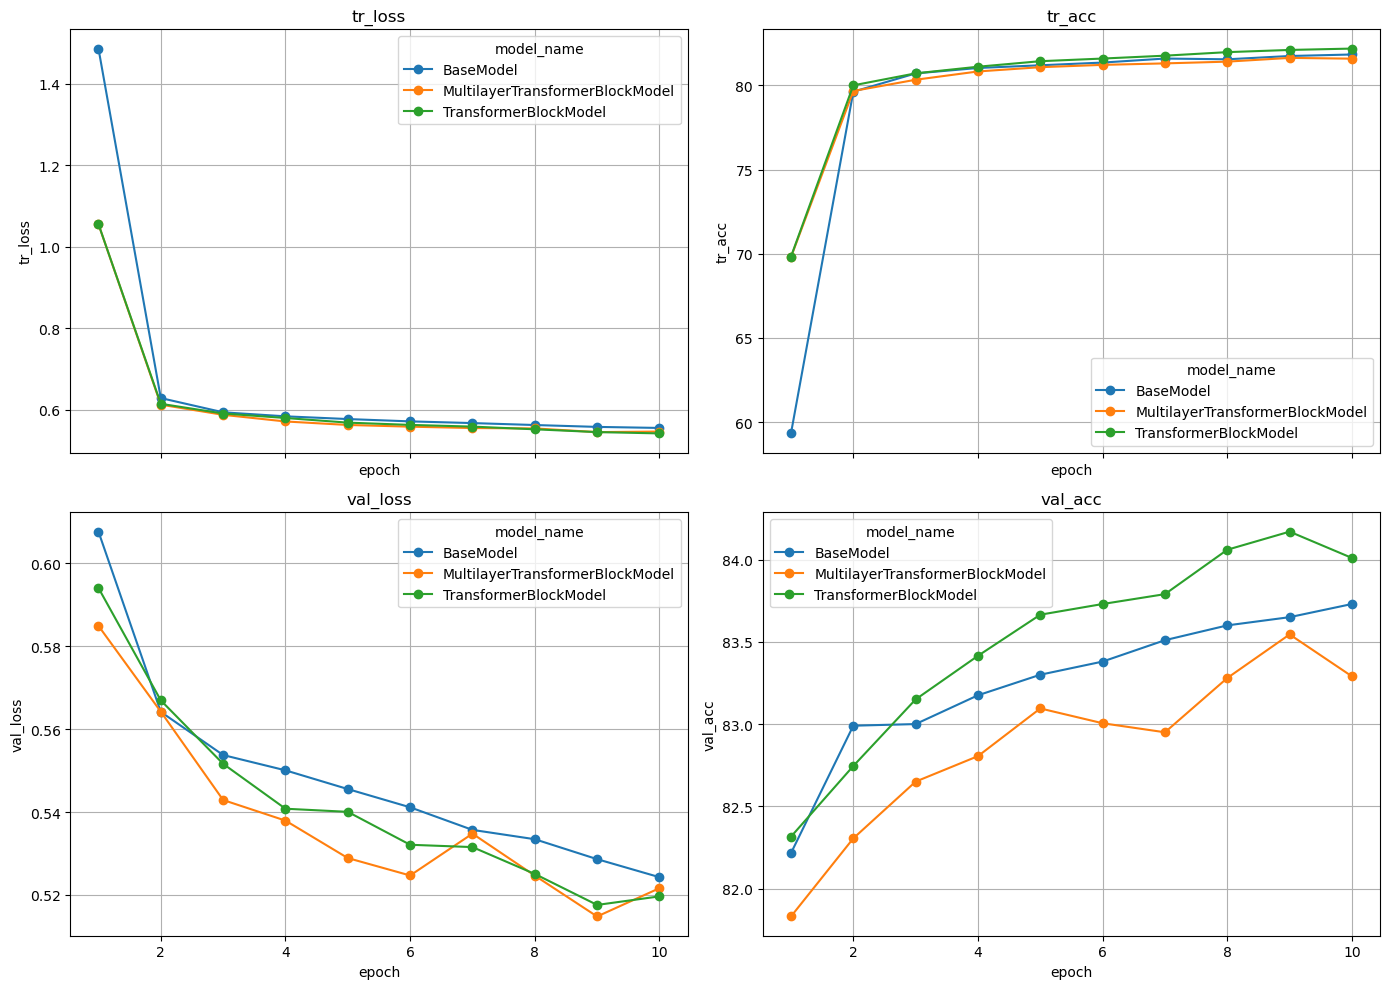

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the plot
metrics = ["tr_loss", "tr_acc", "val_loss", "val_acc"]
colors = sns.color_palette("tab10", len(train_stdd["model_name"].unique()))
models = train_stdd["model_name"].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    for model, color in zip(models, colors):
        model_data = train_stdd[train_stdd["model_name"] == model]
        ax.plot(
            model_data["epoch"],
            model_data[metric]['mean'],
            marker='o',
            label=model,
            color=color
        )
    ax.set_title(metric)
    ax.set_xlabel("epoch")
    ax.set_ylabel(metric)
    ax.legend(title="model_name")
    ax.grid(True)

plt.tight_layout()
plt.show()

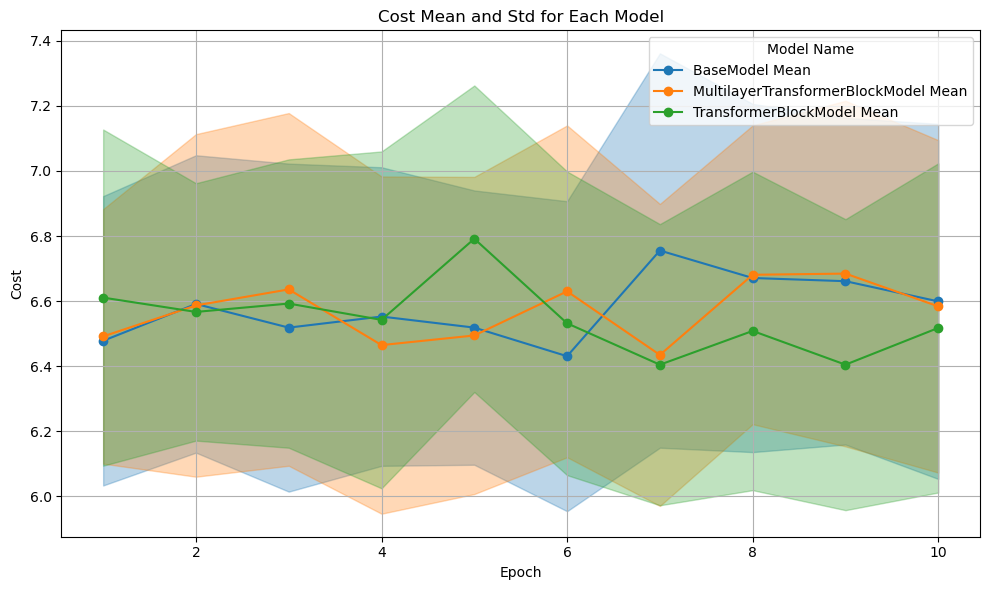

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


eval_df = df_eval

# Sample data (replace with your actual data)
# Assuming `train_stdd` is a DataFrame with `model_name`, `fold`, and `cost` columns

# Unique model names
model_names = eval_stdd["model_name"].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

for model in model_names:
    model_data = eval_df[eval_df["model_name"] == model]
    
    # Calculate mean and std for cost
    cost_mean = model_data.groupby('fold')['cost'].mean().reset_index()
    cost_std = model_data.groupby('fold')['cost'].std().reset_index()
    
    # Plotting the cost mean
    ax.plot(cost_mean['fold'], cost_mean['cost'], marker='o', label=f"{model} Mean", color=sns.color_palette("tab10")[list(model_names).index(model)])
    
    # Plotting the cost std with shaded region
    ax.fill_between(cost_mean['fold'], cost_mean['cost'] - cost_std['cost'], cost_mean['cost'] + cost_std['cost'], 
                    color=sns.color_palette("tab10")[list(model_names).index(model)], alpha=0.3)
    
# Adding title and labels
ax.set_title("Cost Mean and Std for Each Model")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cost")
ax.legend(title="Model Name")
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
